In [1]:
# author: asmiat chatterjee

# datasource:www.kaggle.com

#  data set variable types :
     
     
#  Dependent variable: Survived

# Predictors:

# Numerical

# Age: age in years

# Fare: Passenger fare

# SibSp: # of siblings / spouse aboard the Titanic

# Parch: # of parents / children aboard the Titanic

# Categorical

# Pclass: Ticket Class (1st=1, 2nd=2, 3rd=3)

# Sex: male, female

# Embark: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# --------------------------------------------------------------------------------
# we will follow the below methodology:
    
    
# Import libraries and Load dataset

# --> Reduce data dimension by eliminating irrelevent features

# -->  feature engineering steps 

# – Check and Impute missing cases

# – Discretization via Binning

# – Convert Discrete Features into Binary

# – Convert categorical features into numeric

# --> Analyze features with visualization

# -->Validation Testing and Prediction

# – Split data into training and validation sets

# – Decision Tree Classiﬁcation

# – Prediction using Testing set



##############Impor the libraries 
## import warnings 
import warnings
warnings.filterwarnings("ignore") 


## Import analysis modules
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, model_selection
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc
## Import visualization modules
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import re

from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

%matplotlib inline

from sklearn.tree import export_graphviz


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
train = pd.read_csv('C:/Users/USER/Documents/datasets/final_data/kaggle-titanic-master/input/train.csv')
test = pd.read_csv('C:/Users/USER/Documents/datasets/final_data/kaggle-titanic-master/input/test.csv')

In [4]:
## Basic information about the training set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [7]:
train.shape

(891, 12)

In [8]:
## next check the number of missing values for the train data set 
train.isnull().sum()

# so we can see that out of 891 rows , Age column has 177 missing values,
# Cabin has 687 missing values.Let us now apply missing value imputation 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Bar plot for  catgeorical features 

# Pclass
# Sex
# SibSp ( # of siblings and spouse)
# Parch ( # of parents and children)
# Embarked
# Cabin

#  the below bar plots will help us in determining 
#  the relationship  of various  features  

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

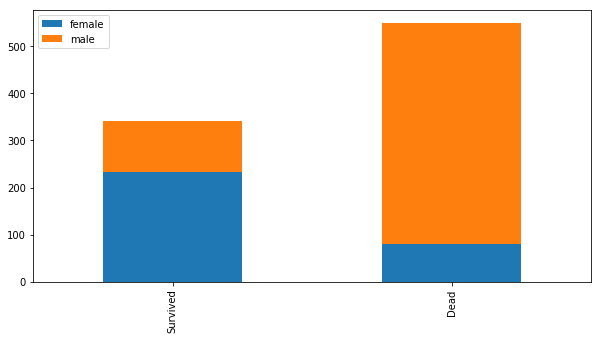

In [12]:
## check the bar chart for sex
    
bar_chart('Sex')

### as we can see  number of females survived more than male

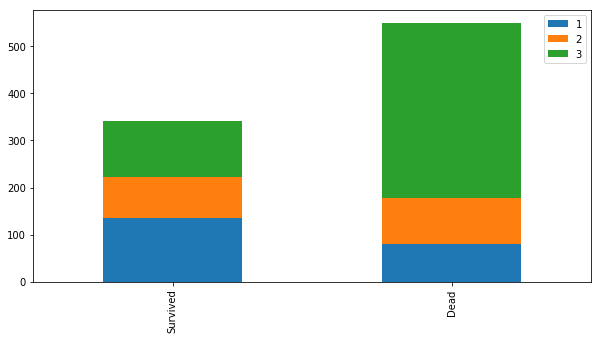

In [13]:
bar_chart('Pclass')

## Pclass =1 survived mroe than Pclass =3
## Pclass =3 survived less than Pclass=1

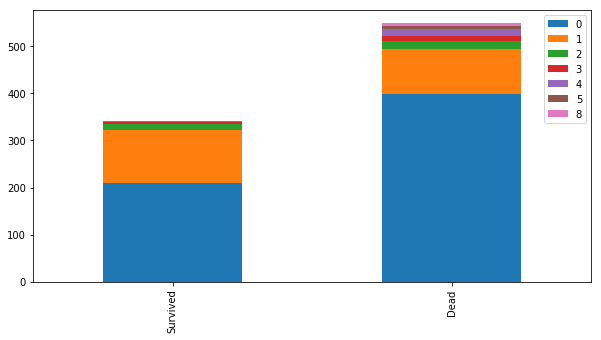

In [14]:
bar_chart('SibSp')
### person with 0 sublings is more likely to be dead 
## Person wh 1 sibling or spouse is more likely to survive

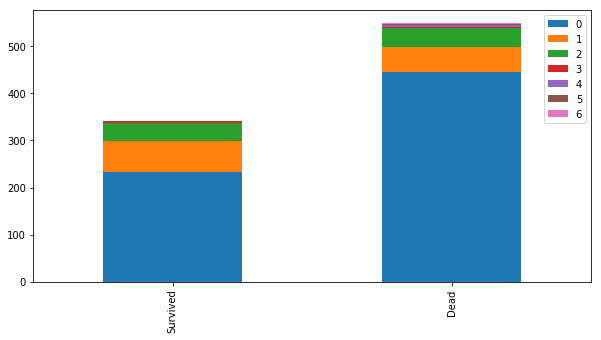

In [15]:
bar_chart('Parch')
# The Chart confirms a person aboarded with 1 or 2  parent or children  likely survived
# The Chart confirms a person aboarded alone more likely dead


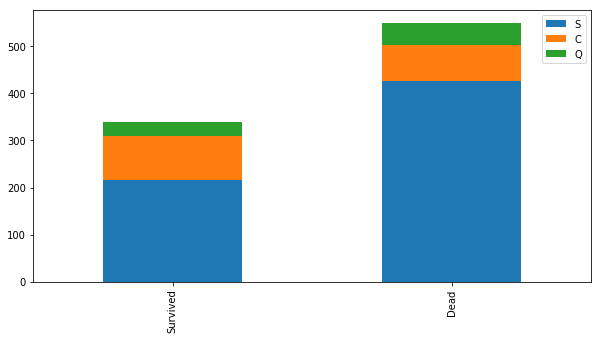

In [16]:
bar_chart('Embarked')
##Passengers from ports C and Q more likely survived 

In [18]:
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

train.head(6)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0


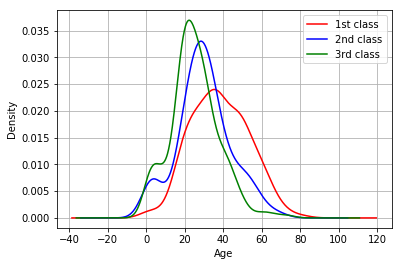

In [19]:
# Before making missing vaue imputations for Age column , since Age is a numeric value 
# so we need to check the distribution of Age w.r.t to another dependent column , so as to determine whether we will  replace the
# missing values with median or mean

# We will check Age with Pclass , since based on passenger class 

train[train.Pclass==1].Age.plot(kind='kde', color='r', label='1st class')
train[train.Pclass==2].Age.plot(kind='kde', color='b', label='2nd class')
train[train.Pclass==3].Age.plot(kind='kde', color='g',label='3rd class')
plt.xlabel('Age')
plt.legend(loc='best')
plt.grid()

# the distribution is skewed . hence  using  mean  as a  missing value imputation is not a fair idea
# use median instead


In [20]:
## Create function to replace NaN with the median value for each ticket class
def fill_missing_age(df):
    for i in range(1,3):
        median_age=df[df["Pclass"]==i]["Age"].median()
        df["Age"]=df["Age"].fillna(median_age)
        return df



In [22]:
### now  impute the missing class 
train = fill_missing_age(train)

In [23]:
## Embarked

## Embarked missing cases 
train[train['Embarked'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [25]:
## to replace the missing value , the best way will be to find out the most nummber of embarked class value

train[train["Embarked"]=='S']["Embarked"].count()##644

644

In [26]:
train[train["Embarked"]=='C']["Embarked"].count()##168

168

In [27]:
train[train["Embarked"]=='Q']["Embarked"].count()####77

77

In [28]:
# hence we find , that embarked  class S has largest value , '
# hence we impute the missiing value with this value 

train["Embarked"]=train["Embarked"].fillna('S')

In [29]:
# next checking the test data set 


test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

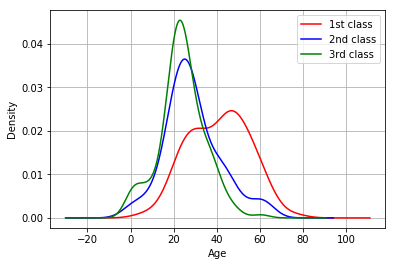

In [30]:
test[test.Pclass==1].Age.plot(kind='kde', color='r', label='1st class')
test[test.Pclass==2].Age.plot(kind='kde', color='b', label='2nd class')
test[test.Pclass==3].Age.plot(kind='kde', color='g',label='3rd class')
plt.xlabel('Age')
plt.legend(loc='best')
plt.grid()

# we find that this distributin is skewed 

# hence here also , we use median as missin value imputation

In [31]:
test = fill_missing_age(test)

In [32]:
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [33]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [34]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [35]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [36]:
## next for each of train and test data  set , 
## we will find out the family size by adding  the number of siblings as well as parenst children 
## travelling in the ship
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [37]:
# next step is discretization via binning 
## mention a variable Title  based on the Name .
## filter out the Mr, Miss , Mrs . 

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [38]:
#### check the title based on the name 
    
## we are incorporating a nw column Title ,so as to determine who monagst sex female or male
    ## did survie
train['Title'] = train['Name'].apply(get_title)
test['Title'] =test['Name'].apply(get_title)

train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,Mrs


In [39]:
## find out the counts of title in train and test dta set 

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Don           1
Countess      1
Lady          1
Jonkheer      1
Ms            1
Sir           1
Capt          1
Name: Title, dtype: int64

In [40]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [41]:
# so we put a title  map based on the people

# Mr : 0
# Miss : 1
# Mrs: 2
# Master: 3
# Others:4

map_title = {"Mr": 0,
                 "Miss": 1,
                 "Mrs": 2, 
                 "Master": 3, 
                 "Dr": 4, 
                 "Rev": 4,
                 "Col": 4,
                 "Major": 4,
                 "Mlle": 4,
                 "Countess": 4,
                 "Ms": 4, 
                 "Lady": 4,
                 "Jonkheer": 4,
                 "Don": 4,
                 "Dona" : 4,
                 "Mme": 4,
                 "Capt": 4,
                 "Sir": 4 }


In [42]:
train['Title'] = train['Title'].map(map_title)

In [43]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1


In [44]:
test['Title'] = test['Title'].map(map_title)
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0


In [45]:
### now drop the redundant variables 
## viz. Passenger Id , name , cabin , Ticket #

## just befpre dropping the passeger id , take the  passenger id of the test data set into a  variable

PassengerId = test['PassengerId']


train=train.drop(['PassengerId','Name','Ticket','Cabin','SibSp','Parch'], axis=1)

test=test.drop(['PassengerId','Name','Ticket','Cabin','SibSp','Parch'], axis=1)

train.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,FamilySize,Title
0,0,3,male,22.0,7.2500,S,0,2,0
1,1,1,female,38.0,71.2833,C,1,2,2
2,1,3,female,26.0,7.9250,S,0,1,1


In [50]:
# Our variables look much cleaner now :
    
# we now have to discretize the numeric variables to the rest of the categorical variables 
# like Sex and Embarked  to binary values 
# as well as 
#  make continuous numeric variables like Age and Fare as 
# discrete classes as below 

## Embarked 

#train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
  
    
     ## Sex 
  
train['Sex'] = train['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
  
 
train.head(3)  

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,FamilySize,Title
0,0,3,0,22.0,7.2500,0,0,2,0
1,1,1,1,38.0,71.2833,1,1,2,2
2,1,3,1,26.0,7.9250,0,0,1,1


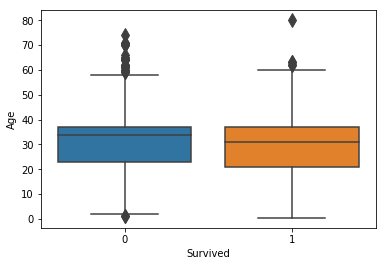

In [52]:
 ### Discretize catgeorical features 
  
  ##Age 

sns.boxplot(x=train["Survived"], y=train["Age"],width=0.8,fliersize=10)

In [53]:
  ### join the data into a single list 
total=[train,test]

In [54]:
## discretize Age feature## checking from visual representation manually 
for dataset in total:
    dataset.loc[ dataset['Age'] <= 19, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 19) & (dataset['Age'] <=29), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 29) & (dataset['Age'] <= 39), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 39) & (dataset['Age'] <= 49), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 49) & (dataset['Age'] <= 62), 'Age'] = 4,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 5

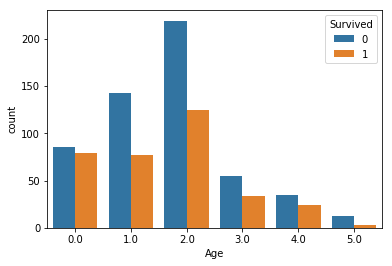

In [55]:
  ## check the plot
  
  sns.countplot(x="Age", data=train, hue="Survived")
  

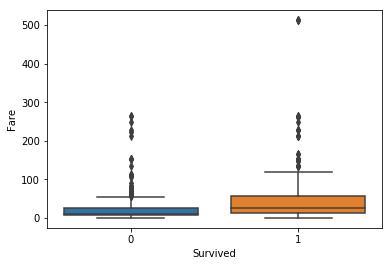

In [56]:
## Boxplot for Fare
sns.boxplot(x=train["Survived"], y=train["Fare"])

In [57]:
for dataset in total:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

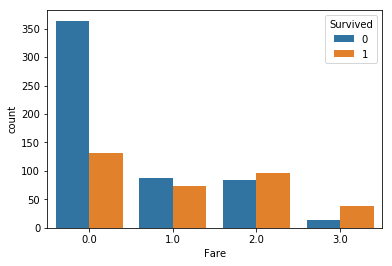

In [58]:
sns.countplot(x="Fare", data=train, hue="Survived")

In [59]:
 train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,FamilySize,Title
0,0,3,0,1.0,0.0,0,0,2,0
1,1,1,1,2.0,2.0,1,1,2,2
2,1,3,1,1.0,0.0,0,0,1,1
3,1,1,1,2.0,2.0,0,1,2,2
4,0,3,0,2.0,0.0,0,0,1,0


In [60]:

#    In the case of decision trees, the 'max_depth' parameter determines the maximum number
#    of attributes the model is going to use for each prediction (up to the number of
#    available features in the dataset). A good way to find the best value for this 
#    parameter is just iterating through all the possible depths 
#    and measure the accuracy with a robust method such as Cross Validation.

#     Cross Validation is a model validation technique that splits
#     the training dataset in a given number of "folds". 
#     Each split uses different data for training and 
#     testing purposes, allowing the model to be trained and tested with 
#     different data each time. This allows the algorithm to be trained and tested
#     with all available data across all folds, avoiding any splitting bias and
#     giving a good idea of the generalisation of the chosen model. 
      ##  get the spplitted data set values in separate variables 
y_train = train['Survived']
x_train = train.drop(['Survived'], axis=1).values 
x_test = test.values


In [63]:
## applying gridsearchcv

classfier = DecisionTreeClassifier()
dt_grid = {'max_depth':[3,4,5,6], 'criterion':['gini','entropy']}

In [65]:
grid_classifier = model_selection.GridSearchCV(classfier, dt_grid, cv=10, scoring='accuracy',refit=True, 
                                              n_jobs=-1, return_train_score=True)

In [66]:
grid_classifier.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [67]:
print(grid_classifier.best_params_)

{'criterion': 'gini', 'max_depth': 3}


In [68]:
print(grid_classifier.best_score_)

0.8294051627384961


In [70]:
final_model = grid_classifier.best_estimator_
print(final_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [71]:
# now applying the bext parramatrs on the final tree model 

 # Create Decision Tree with max_depth = 3
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth = 3)
decision_tree.fit(x_train, y_train)
 
y_pred= decision_tree.predict(x_test)


In [72]:
# Export our trained model as a .dot file

with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(train.drop(['Survived'], axis=1)),
                              class_names = ['Died', 'Survived'],
                              rounded = True,
                              filled= True )
    

In [ ]:
# The .dot file consists of the decision tree classifier details 
# with various branches and the leaf nodes.
# Since there  was some issue in   converting the .dot file  n spyder IDE

# # so I followed the steps mentioned in the Decision_tree_visualization document 


In [77]:
# decision tree Score
round(decision_tree.score(x_train, y_train) * 100, 2)

82.38

In [78]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred
    })



In [80]:
submission.to_csv('submission.csv', index=False)